In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#imports for k-means
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from MissingValues_2 import remove_missing_values
from outliers import countOutliers
from outliers import removeOutliers
from formula_1_2_correction import correct_ps_values

from sklearn.metrics import *
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from scipy.stats import mode
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage, dendrogram

from itertools import combinations

from scipy.cluster.hierarchy import fcluster

import matplotlib.cm as cm
import pickle

import ipympl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

C:\Users\madda\Desktop\Magistrale\Secondo Anno\DataMining\outliers.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\madda\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\madda\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\madda\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\madda\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\madda\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\ma

In [2]:
def barChart(df, title_, xlabel_, ylabel_, legend, legend_title, xticks_, save, rotation_,yscale=False,yaxis=[]):
    ax=df.plot(kind='bar', figsize=(10,6), width=0.9, fontsize=14)
    ax.set_title(title_, {'fontsize':20})
    ax.set_xlabel(xlabel_, { 'size'   : 17})
    ax.set_ylabel(ylabel_,  {'size'   : 17})
    if(len(xticks_)>0):
        x_pos = [i for i, _ in enumerate(xticks_)]
        plt.xticks(x_pos, xticks_, rotation=rotation_)
    if(yscale):
        plt.yscale('log')
    if(len(yaxis)>0):
        ax.yaxis.set_ticks(yaxis)
    if legend:
        leg=ax.legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.7))
        leg.set_title(title=legend_title,  prop = {'size':'x-large'})
    else:
        leg=ax.legend()
        leg.set_visible(False)
    plt.grid(color='grey', linestyle='--', linewidth=0.5)
    if save : 
        plt.savefig(title_+'.pdf', dpi=1000, bbox_inches = "tight", pad_inches = 1)
    plt.show()

def kmeans(data, min_k, max_k): #wantSil = True if i want also the silhouette
               
    X = scaler.fit_transform(data.values)
    sse_list = list()
    sil = list()
    labels_=list()
    centers_=list()
    
    for k in range(min_k,max_k):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
        kmeans.fit(X)
        sse = kmeans.inertia_
        sse_list.append(sse)
        labels_.append(kmeans.labels_)
        centers_.append(kmeans.cluster_centers_)
        sil.append(silhouette_score(X, kmeans.labels_))
        
    return sse_list,sil,labels_,centers_

def plot_sse(sse):
    
    plt.plot(sse)
    plt.ylabel('SSE', fontsize=22)
    plt.xlabel('K', fontsize=22)
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.show()
    
def analyze_km(df,labels,centers_,sil):
        
        print('Silhouette: ',sil)
        hist, bins = np.histogram(labels, bins=range(0, len(set(labels)) + 1))
        d=dict(zip(bins, hist))
        print(d)

        td=scaler.fit_transform(df.values)
        
        centers=centers_
        #centers = scaler.inverse_transform(centers_)

        n_clusters=len(centers)
        
        fig, (ax1) = plt.subplots(1, 1)
        fig.set_size_inches(15, 6)

        ax1.set_xlim([-0.5, 1])
        ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

        silhouette_avg = sil
        
        cluster_labels=labels
        sample_silhouette_values = silhouette_samples(td, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
        plt.figure(figsize=(15, 6))
        for i in range(0, len(centers)):
            plt.plot(centers[i], marker='o', label='Cluster %s' % i)
        plt.tick_params(axis='both', which='major', labelsize=22)
                
        plt.xticks(range(0,len(df.columns)), df.columns, fontsize=18)
        plt.legend(fontsize=20)
        plt.show()

def plotbar(df1,labels_,title,yscale=False):
    
    labels=labels_
    df1['Lab']=labels
    dts=[]
    for i in range(0, len(set(df1['Lab'].values))):
        dts.append(df1.loc[df1['Lab']==i].drop("Lab", axis=1))
        
    s=[]
    for i in range(0,len(dts)):
        s.append(pd.DataFrame(dts[i].agg({#'limit':np.mean,
                'ps_m':np.mean,
                #'ba_m':np.mean,
                #'pa_m':np.mean,
                'age':np.mean,
                
                
                }),columns=['Cluster '+str(i)]))
    result = pd.concat(s, axis=1, sort=False)

    barChart(result.T,title,"Clusters","Values",True,'Crimes',result.T.index,0,90,yscale)
    df1.drop('Lab',axis=1,inplace=True)
    return result        
        
def figure3d(df,labels):
    
    Xlab=df.columns[0]
    Ylab=df.columns[1]
    Zlab=df.columns[2]
    
    X=scaler.fit_transform(df[[Xlab]])
    Y=scaler.fit_transform(df[[Ylab]])
    Z=scaler.fit_transform(df[[Zlab]])
    
    X=X.reshape(1,len(X))
    Y=Y.reshape(1,len(Y))
    Z=Z.reshape(1,len(Z))
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[0],Y[0],Z[0], c=labels)
    ax.set_xlabel(Xlab)
    ax.set_ylabel(Ylab)
    ax.set_zlabel(Zlab)
    
    plt.show()

In [3]:
#load dataset into a dataframe
credit_cards = pd.read_csv("credit_default_train.csv")
data = remove_missing_values(credit_cards)
data=removeOutliers(data)

Number of rows to be dropped:  30
size:  9970


In [4]:
data.head()

,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,...,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,credit_default
0,50000,male,graduate school,single,25,2,0,0,0,0,...,49535,30358,30302,2130,1905,1811,1100,1100,1200,no
1,200000,male,university,married,54,-1,-1,-1,-1,-1,...,6335,4616,7956,10120,7852,6336,4622,7956,5499,no
2,30000,female,high school,married,39,2,3,2,2,2,...,30496,29731,29047,0,1700,1100,3,1053,1303,no
3,140000,female,university,single,31,0,0,0,0,0,...,25224,26855,23783,2000,2000,900,2000,10000,5000,no
4,60000,female,high school,married,36,1,2,2,0,0,...,48738,49601,52773,1788,0,1894,1801,3997,0,yes


In [5]:
data['ps_mode']=data[['ps-sep','ps-aug','ps-jul','ps-jun','ps-may','ps-apr']].mode(axis=1)[0]
data['ba_m']=(data['ba-aug']+data['ba-jul']+data['ba-jun']+data['ba-may']+data['ba-apr']+data['ba-sep'])/6
data['pa_m']=(data['pa-sep']+data['pa-aug']+data['pa-jul']+data['pa-jun']+data['pa-may']+data['pa-apr'])/6

In [6]:
data.head()

,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,...,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,credit_default,ps_mode,ba_m,pa_m
0,50000,male,graduate school,single,25,2,0,0,0,0,...,2130,1905,1811,1100,1100,1200,no,0.0,43317.666667,1541.000000
1,200000,male,university,married,54,-1,-1,-1,-1,-1,...,10120,7852,6336,4622,7956,5499,no,-1.0,7914.333333,7064.166667
2,30000,female,high school,married,39,2,3,2,2,2,...,0,1700,1100,3,1053,1303,no,2.0,29802.833333,859.833333
3,140000,female,university,single,31,0,0,0,0,0,...,2000,2000,900,2000,10000,5000,no,0.0,36138.000000,3650.000000
4,60000,female,high school,married,36,1,2,2,0,0,...,1788,0,1894,1801,3997,0,yes,0.0,49241.166667,1580.000000


In [8]:
scaler=MinMaxScaler()

# limit, ba,pa

In [19]:
sse, sil, lab, cent=kmeans(data[['limit','ba_m','pa_m']],2,20)

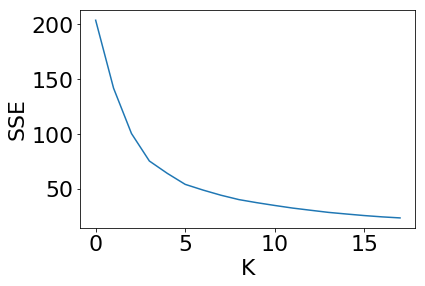

In [20]:
plot_sse(sse)

Silhouette:  0.5052655263612629
{0: 356, 1: 4700, 2: 2476, 3: 1164, 4: 1274}


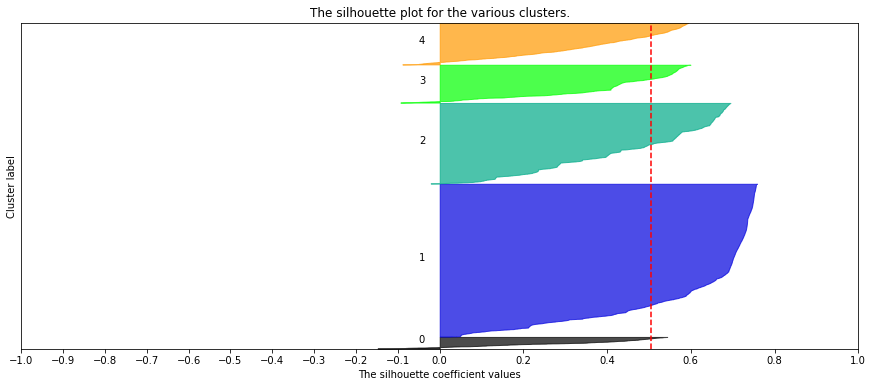

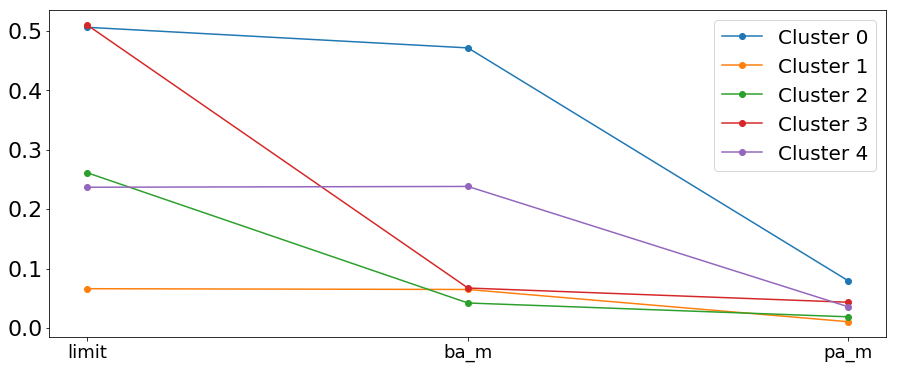

In [21]:
analyze_km(data[['limit','ba_m','pa_m']],lab[3],cent[3],sil[3])

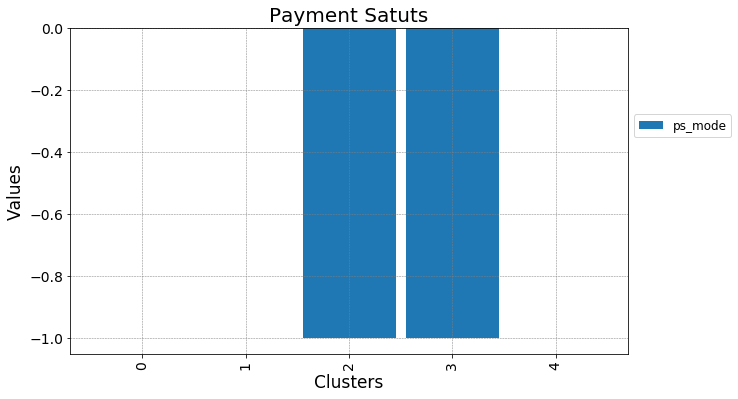

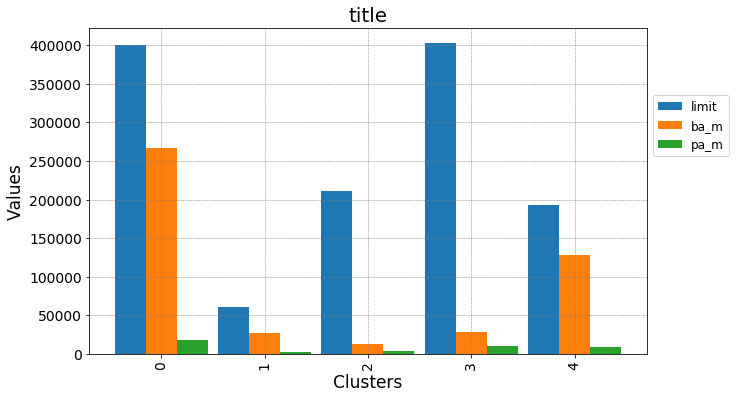

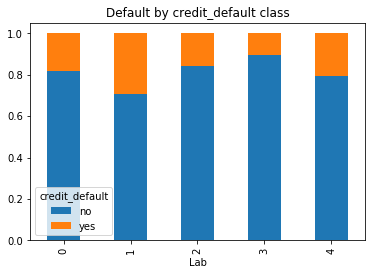

In [23]:
from scipy import stats
k=3

data['Lab']=lab[k]

result=pd.DataFrame(data.groupby(['Lab'], as_index=False).agg({'ps_mode': lambda x:stats.mode(x)[0]}))
result.drop('Lab',axis=1,inplace=True)
barChart(result,"Payment Satuts","Clusters","Values",True,"",result.index,0,90,False)

result=pd.DataFrame(data.groupby(['Lab'], as_index=False).agg({'limit':np.mean,
                'ba_m':np.mean,
                'pa_m':np.mean}))
result.drop('Lab',axis=1,inplace=True)
barChart(result,"title","Clusters","Values",True,"",result.index,0,90,False)

crosstab = pd.crosstab( data['Lab'], data['credit_default'],normalize='index')
crosstab.plot(kind='bar', stacked=True, title='Default by ' + str('credit_default') + ' class')


# ALL BA, PA

In [122]:
sse4, sil4, lab4, cent4=kmeans(data[['limit','ba-sep','ba-aug','ba-jul','ba-jun','ba-may','ba-apr','pa-sep','pa-aug','pa-jul','pa-jun','pa-may','pa-apr']],2,20)

C:\Users\madda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


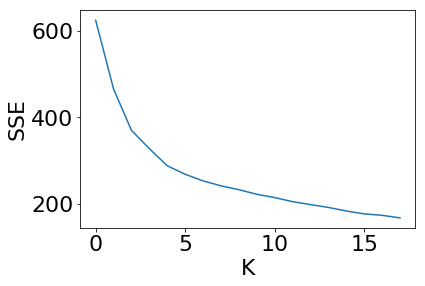

In [123]:
plot_sse(sse4)

Silhouette:  0.36863239123095265
{0: 1088, 1: 4127, 2: 1506, 3: 2359, 4: 152, 5: 738}


C:\Users\madda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


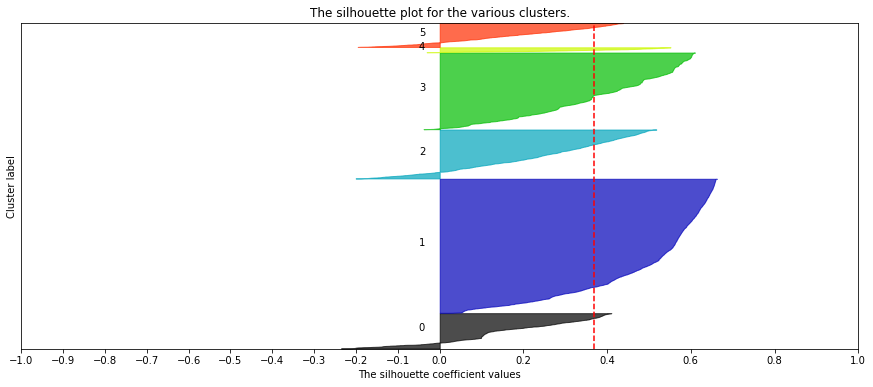

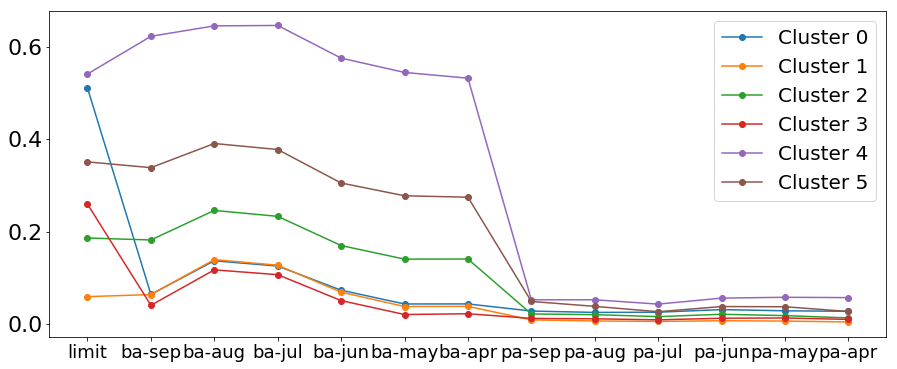

In [127]:
analyze_km(data[['limit','ba-sep','ba-aug','ba-jul','ba-jun','ba-may','ba-apr','pa-sep','pa-aug','pa-jul','pa-jun','pa-may','pa-apr']],lab4[4],cent4[4],sil4[4])

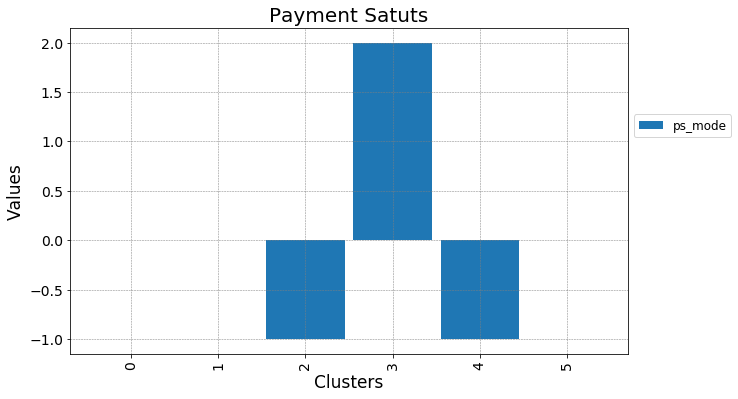

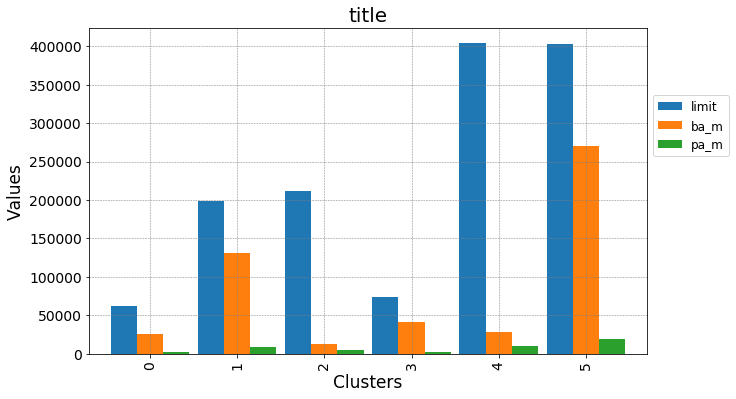

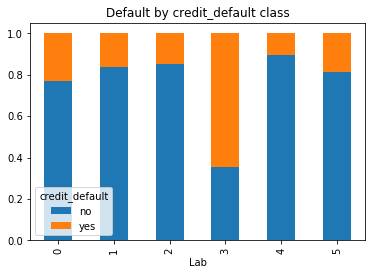

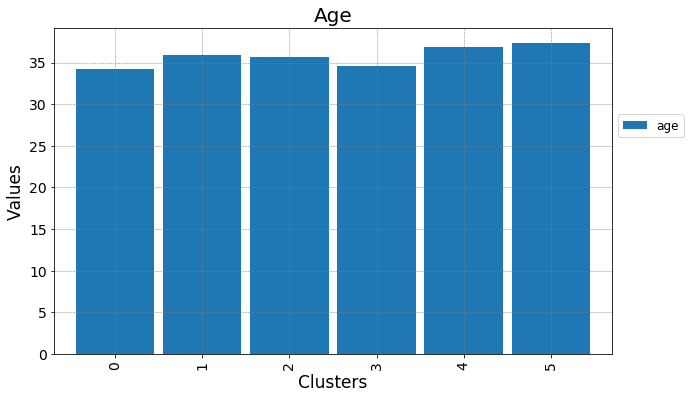

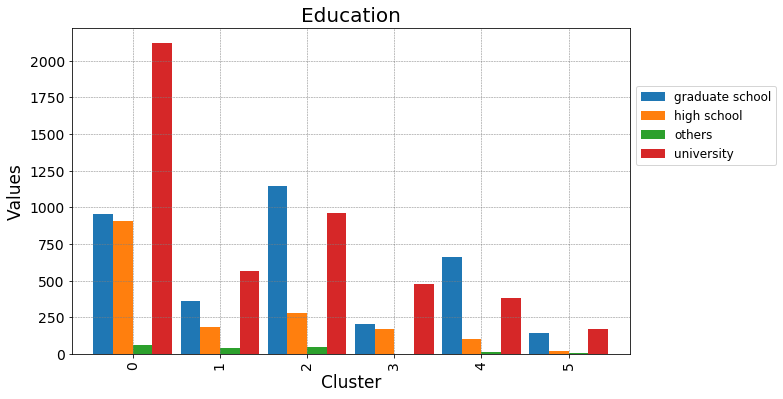

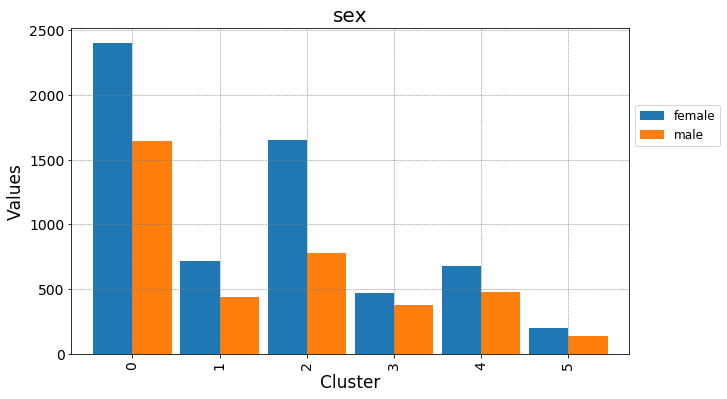

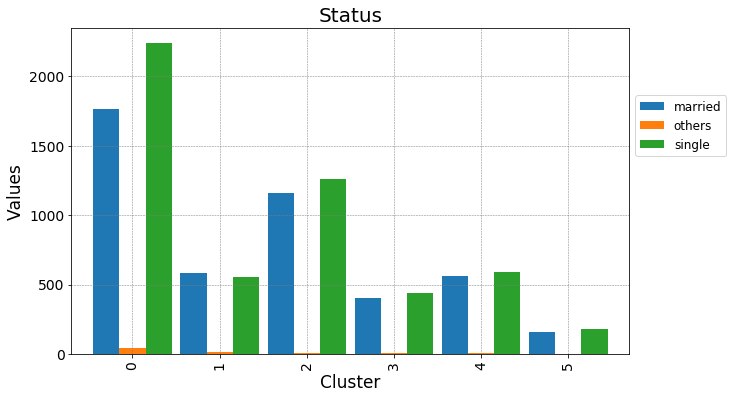

In [130]:
from scipy import stats
k=4

data2['Lab']=lab4[k]

result=pd.DataFrame(data.groupby(['Lab'], as_index=False).agg({'ps_mode': lambda x:stats.mode(x)[0]}))
result.drop('Lab',axis=1,inplace=True)
barChart(result,"Payment Satuts","Clusters","Values",True,"",result.index,0,90,False)

result=pd.DataFrame(data.groupby(['Lab'], as_index=False).agg({'limit':np.mean,
                'ba_m':np.mean,
                'pa_m':np.mean}))
result.drop('Lab',axis=1,inplace=True)
barChart(result,"title","Clusters","Values",True,"",result.index,0,90,False)

crosstab = pd.crosstab( data['Lab'], data['credit_default'],normalize='index')
crosstab.plot(kind='bar', stacked=True, title='Default by ' + str('credit_default') + ' class')

result=pd.DataFrame(data.groupby(['Lab'], as_index=False).agg({'age':np.mean}))
result.drop('Lab',axis=1,inplace=True)
barChart(result,"Age","Clusters","Values",True,"",result.index,0,90,False)

cross=pd.crosstab(data['Lab'],data['education'])
barChart(cross,'Education','Cluster','Values',True,"",cross.index,0,90,False)

cross=pd.crosstab(data['Lab'],data['sex'])
barChart(cross,'sex','Cluster','Values',True,"",cross.index,0,90,False)

cross=pd.crosstab(data['Lab'],data['status'])
barChart(cross,'Status','Cluster','Values',True,"",cross.index,0,90,False)

_=data2.drop('Lab',axis=1)

# Transformation of ps-values from -2,-1 to 0

# Kmeans with mean

In [41]:
data2=data.copy()

In [47]:
data2.loc[data2['ps-sep'] <0, 'ps-sep'] = 0
data2.loc[data2['ps-aug'] <0, 'ps-aug'] = 0
data2.loc[data2['ps-jul'] <0, 'ps-jul'] = 0
data2.loc[data2['ps-jun'] <0, 'ps-jun'] = 0
data2.loc[data2['ps-may'] <0, 'ps-may'] = 0
data2.loc[data2['ps-apr'] <0, 'ps-apr'] = 0

In [56]:
data2['ps-jul'].unique()

array([0, 2, 4, 3, 7, 6, 5, 8, 1], dtype=int64)

In [57]:
data2['ps_m']=(data2['ps-sep']+data2['ps-aug']+data2['ps-jul']+data2['ps-jun']+data2['ps-may']+data2['ps-apr'])/6

In [68]:
sse1, sil1, lab1, cent1=kmeans(data2[['limit','ba_m','pa_m','ps_m']],2,20)

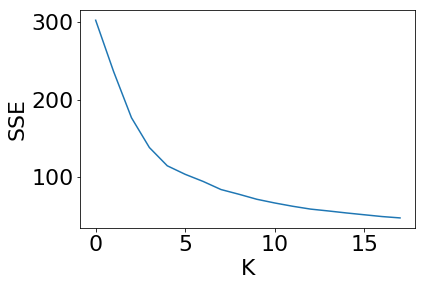

In [69]:
plot_sse(sse1)

Silhouette:  0.4297932085642932
{0: 4044, 1: 1150, 2: 2432, 3: 850, 4: 1155, 5: 339}


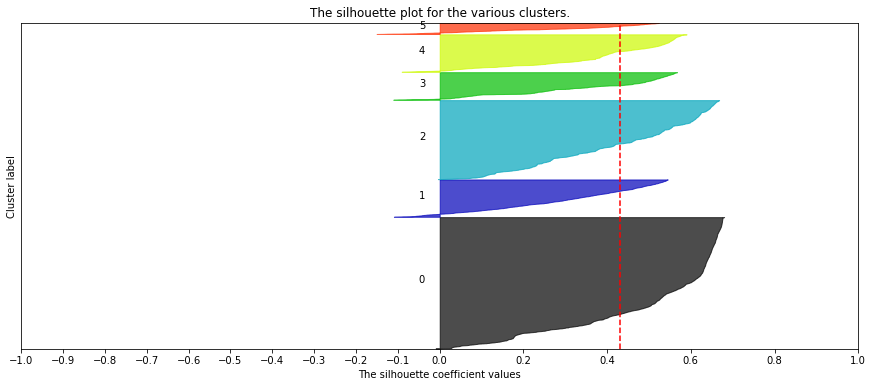

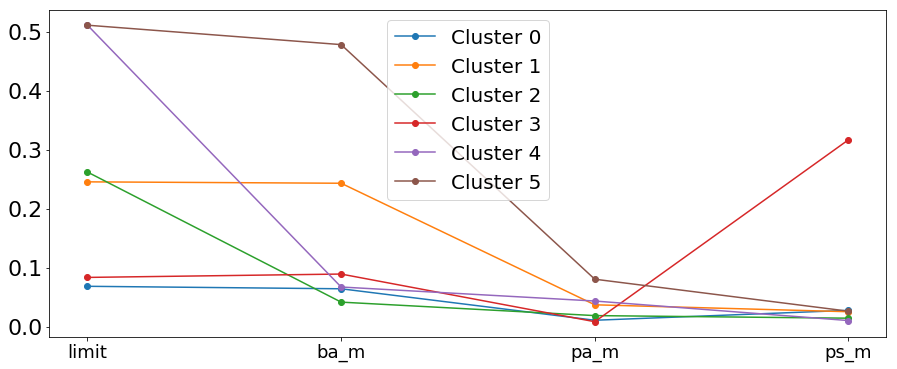

In [71]:
analyze_km(data2[['limit','ba_m','pa_m','ps_m']],lab1[4],cent1[4],sil1[4])

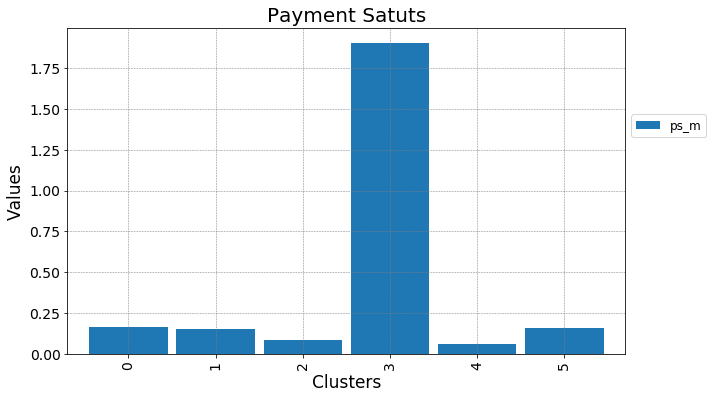

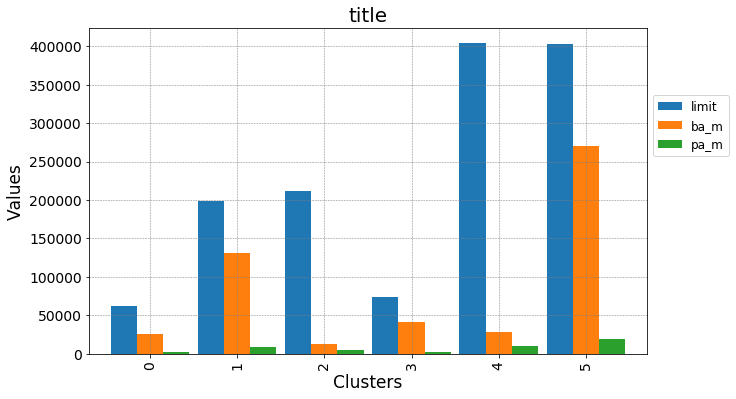

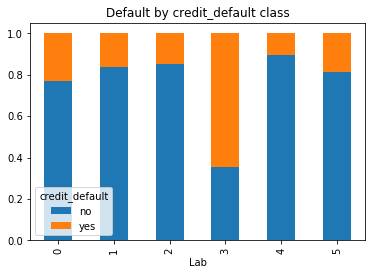

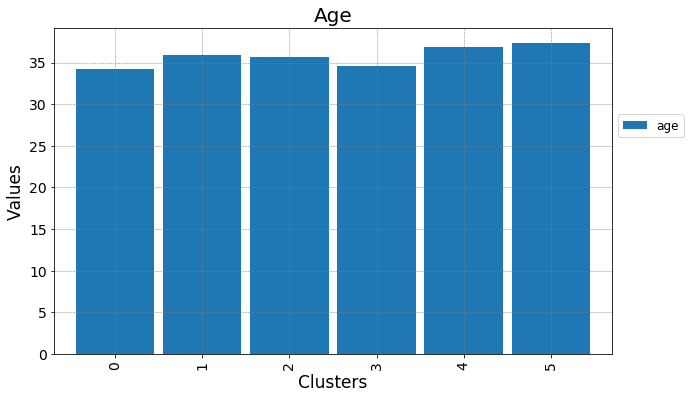

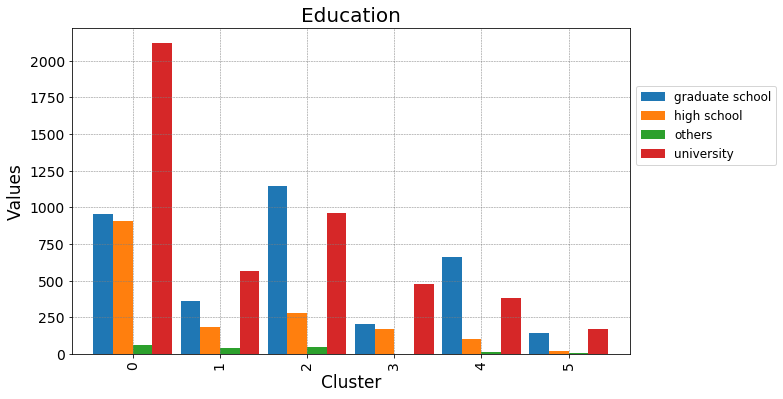

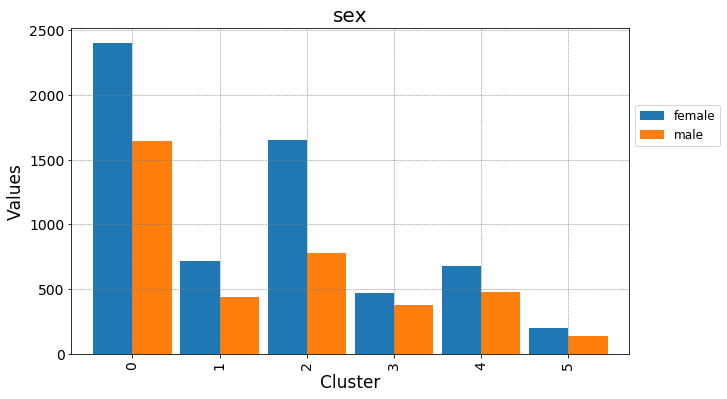

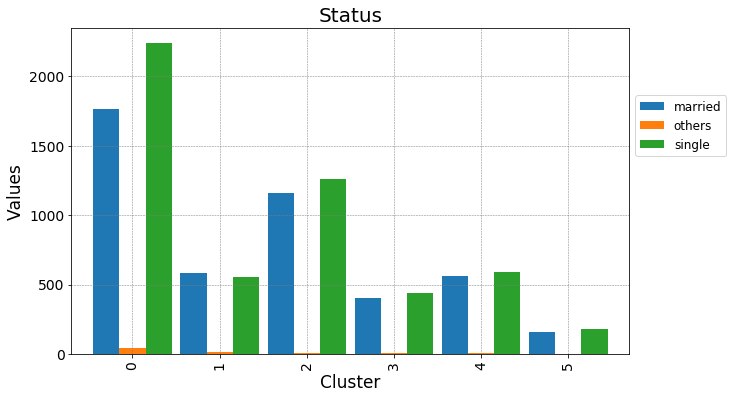

In [76]:
from scipy import stats
k=4

data2['Lab']=lab1[k]

result=pd.DataFrame(data2.groupby(['Lab'], as_index=False).agg({'ps_m': np.mean}))
result.drop('Lab',axis=1,inplace=True)
barChart(result,"Payment Satuts","Clusters","Values",True,"",result.index,0,90,False)

result=pd.DataFrame(data2.groupby(['Lab'], as_index=False).agg({'limit':np.mean,
                'ba_m':np.mean,
                'pa_m':np.mean}))
result.drop('Lab',axis=1,inplace=True)
barChart(result,"title","Clusters","Values",True,"",result.index,0,90,False)

crosstab = pd.crosstab( data2['Lab'], data2['credit_default'],normalize='index')
crosstab.plot(kind='bar', stacked=True, title='Default by ' + str('credit_default') + ' class')

result=pd.DataFrame(data2.groupby(['Lab'], as_index=False).agg({'age':np.mean}))
result.drop('Lab',axis=1,inplace=True)
barChart(result,"Age","Clusters","Values",True,"",result.index,0,90,False)

cross=pd.crosstab(data2['Lab'],data2['education'])
barChart(cross,'Education','Cluster','Values',True,"",cross.index,0,90,False)

cross=pd.crosstab(data2['Lab'],data2['sex'])
barChart(cross,'sex','Cluster','Values',True,"",cross.index,0,90,False)

cross=pd.crosstab(data2['Lab'],data2['status'])
barChart(cross,'Status','Cluster','Values',True,"",cross.index,0,90,False)

_=data2.drop('Lab',axis=1)

# kmeans with mode 

In [83]:
data2['ps_mode']=data2[['ps-sep','ps-aug','ps-jul','ps-jun','ps-may','ps-apr']].mode(axis=1)[0]


In [84]:
sse2, sil2, lab2, cent2=kmeans(data2[['limit','ba_m','pa_m','ps_mode']],2,20)

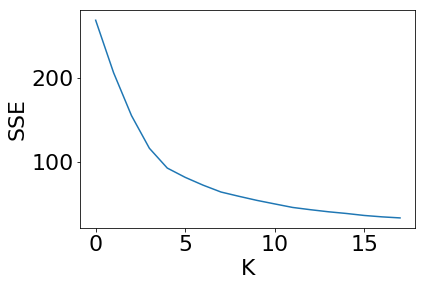

In [85]:
plot_sse(sse2)

Silhouette:  0.46843844171793336
{0: 1112, 1: 3814, 2: 1215, 3: 510, 4: 310, 5: 756, 6: 2253}


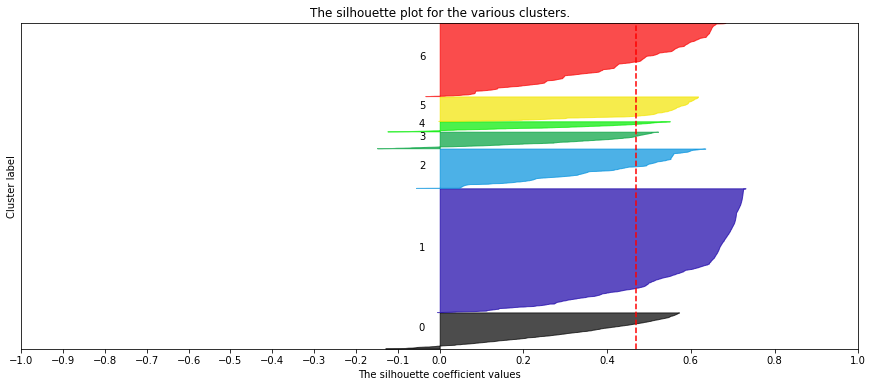

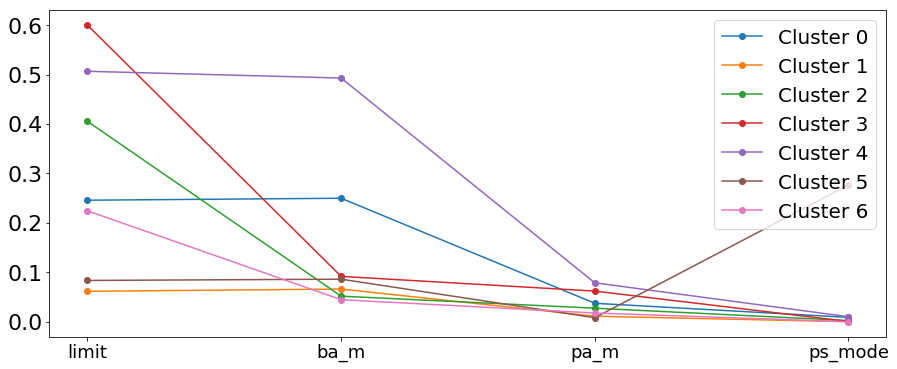

In [87]:
analyze_km(data2[['limit','ba_m','pa_m','ps_mode']],lab2[5],cent2[5],sil2[5])

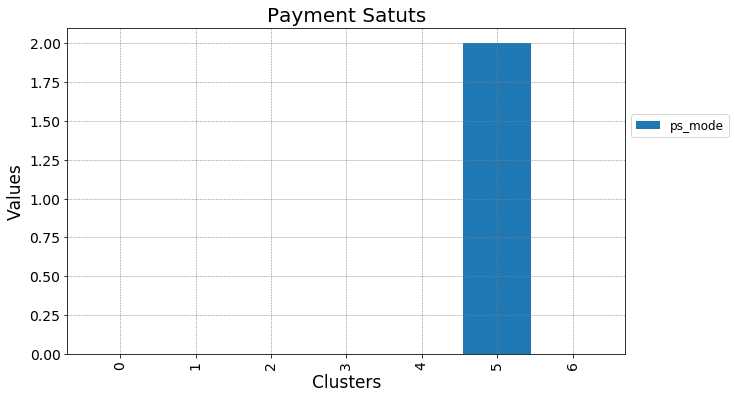

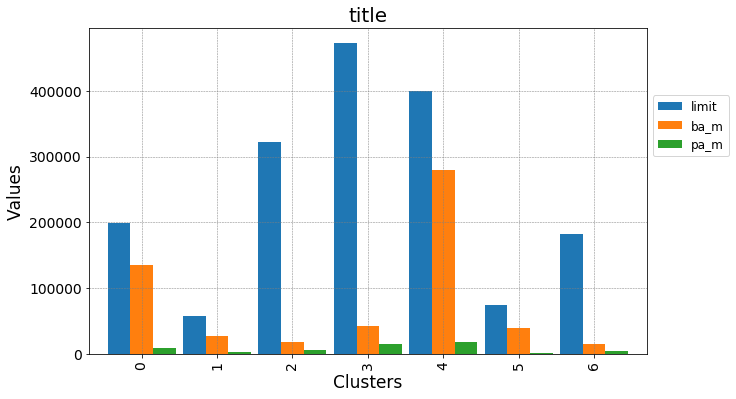

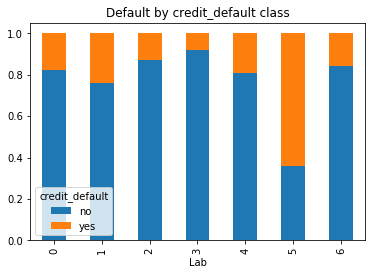

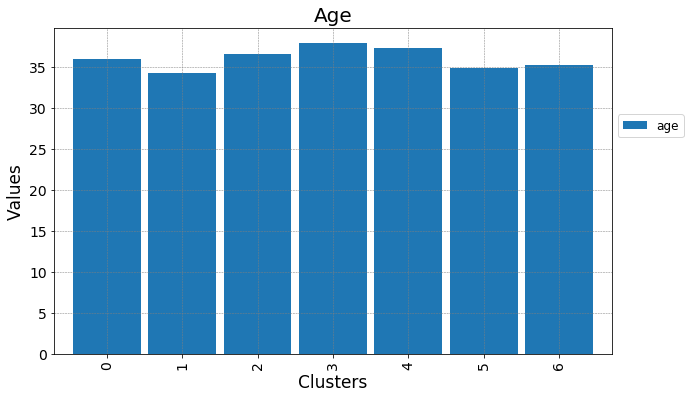

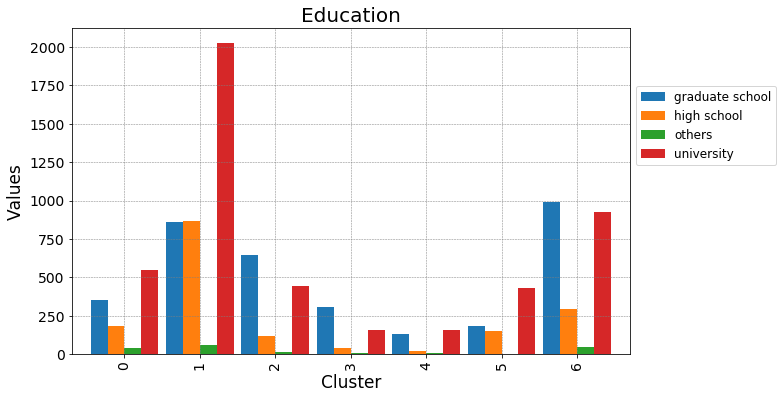

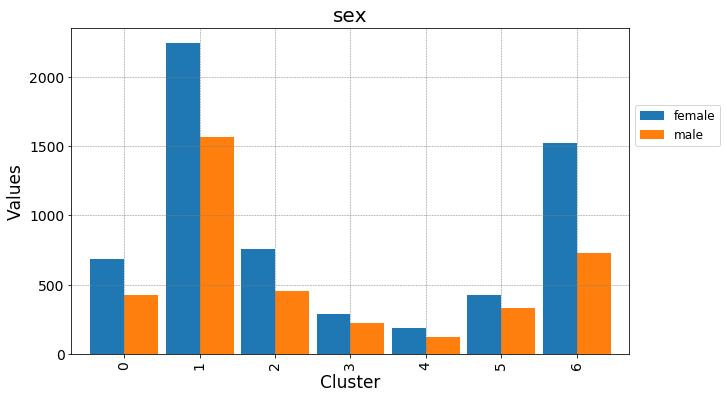

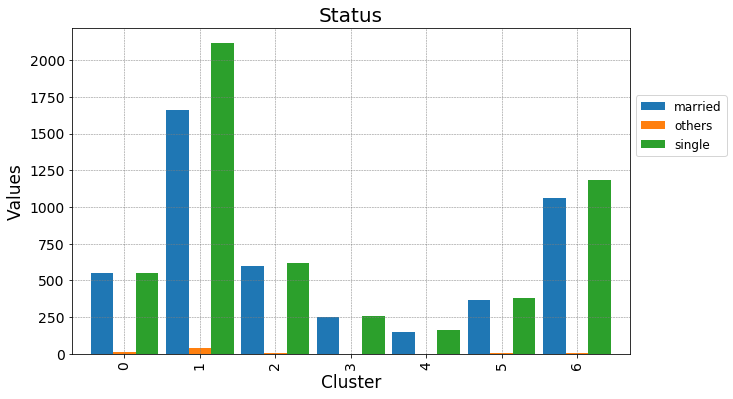

In [90]:
from scipy import stats
k=5

data2['Lab']=lab2[k]

result=pd.DataFrame(data2.groupby(['Lab'], as_index=False).agg({'ps_mode': lambda x:stats.mode(x)[0]}))
result.drop('Lab',axis=1,inplace=True)
barChart(result,"Payment Satuts","Clusters","Values",True,"",result.index,0,90,False)

result=pd.DataFrame(data2.groupby(['Lab'], as_index=False).agg({'limit':np.mean,
                'ba_m':np.mean,
                'pa_m':np.mean}))
result.drop('Lab',axis=1,inplace=True)
barChart(result,"title","Clusters","Values",True,"",result.index,0,90,False)

crosstab = pd.crosstab( data2['Lab'], data2['credit_default'],normalize='index')
crosstab.plot(kind='bar', stacked=True, title='Default by ' + str('credit_default') + ' class')

result=pd.DataFrame(data2.groupby(['Lab'], as_index=False).agg({'age':np.mean}))
result.drop('Lab',axis=1,inplace=True)
barChart(result,"Age","Clusters","Values",True,"",result.index,0,90,False)

cross=pd.crosstab(data2['Lab'],data2['education'])
barChart(cross,'Education','Cluster','Values',True,"",cross.index,0,90,False)

cross=pd.crosstab(data2['Lab'],data2['sex'])
barChart(cross,'sex','Cluster','Values',True,"",cross.index,0,90,False)

cross=pd.crosstab(data2['Lab'],data2['status'])
barChart(cross,'Status','Cluster','Values',True,"",cross.index,0,90,False)

_=data2.drop('Lab',axis=1)

# PS + = 2

In [78]:
data3=data.copy()

In [106]:
def sum_2(values):
    l=[]
    for x in values:
        l.append(x+2)
    return l

In [111]:
data3['ps-sep']=sum_2(data3['ps-sep'].values)
data3['ps-aug']=sum_2(data3['ps-aug'].values)
data3['ps-jul']=sum_2(data3['ps-jul'].values)
data3['ps-jun']=sum_2(data3['ps-jun'].values)
data3['ps-may']=sum_2(data3['ps-may'].values)
data3['ps-apr']=sum_2(data3['ps-apr'].values)

In [112]:
data3['ps_mode']=data3[['ps-sep','ps-aug','ps-jul','ps-jun','ps-may','ps-apr']].mode(axis=1)[0]


In [113]:
sse3, sil3, lab3, cent3=kmeans(data3[['limit','ba_m','pa_m','ps_mode']],2,20)

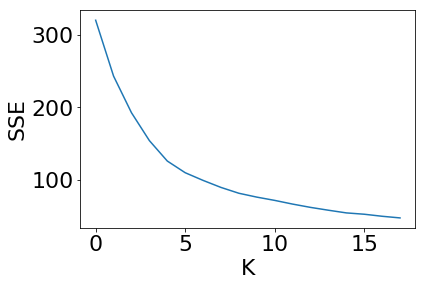

In [114]:
plot_sse(sse3)

In [117]:
sse3

[319.914842532732,
 242.91891742321192,
 192.46185317830475,
 154.035711021008,
 125.8873970441671,
 109.78437466530079,
 99.18951164675985,
 89.4928283111135,
 81.4645629766296,
 76.1542235610699,
 71.64113626018965,
 66.54152745713665,
 61.99696890973259,
 58.087779579251496,
 54.404916544945834,
 52.56862291370815,
 49.757826297500756,
 47.48937769745396]

Silhouette:  0.40159111828572275
{0: 829, 1: 3226, 2: 1047, 3: 1303, 4: 1930, 5: 1285, 6: 350}


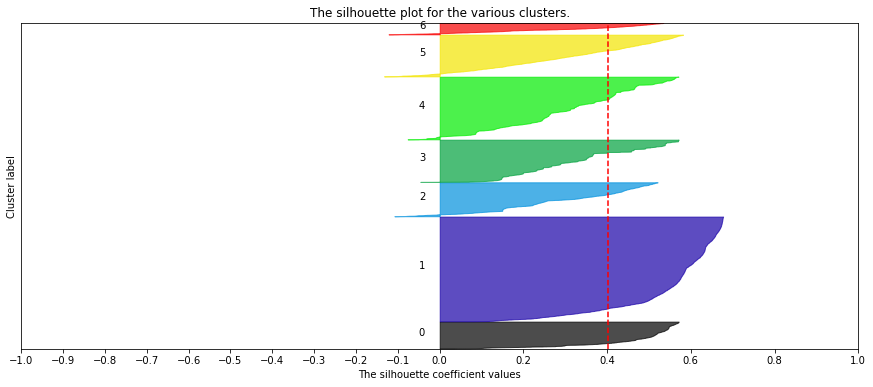

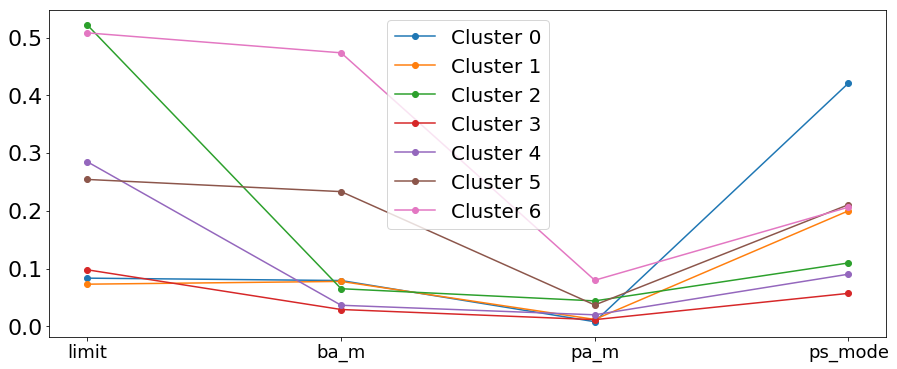

In [119]:
analyze_km(data3[['limit','ba_m','pa_m','ps_mode']],lab3[5],cent3[5],sil3[5])

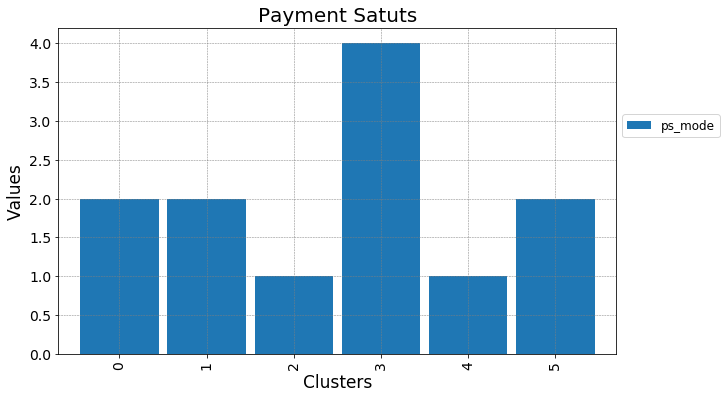

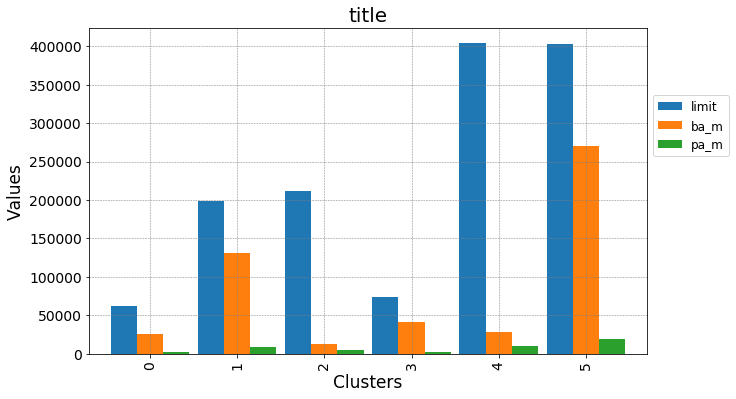

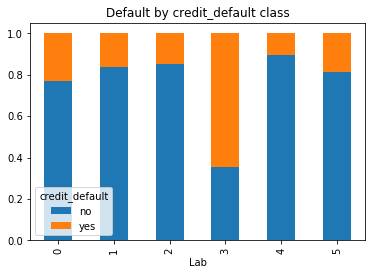

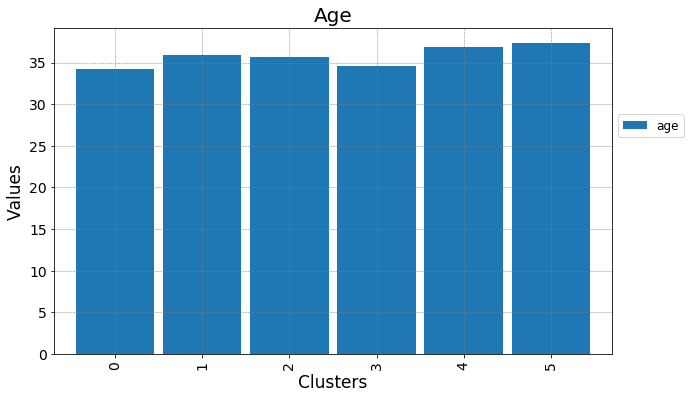

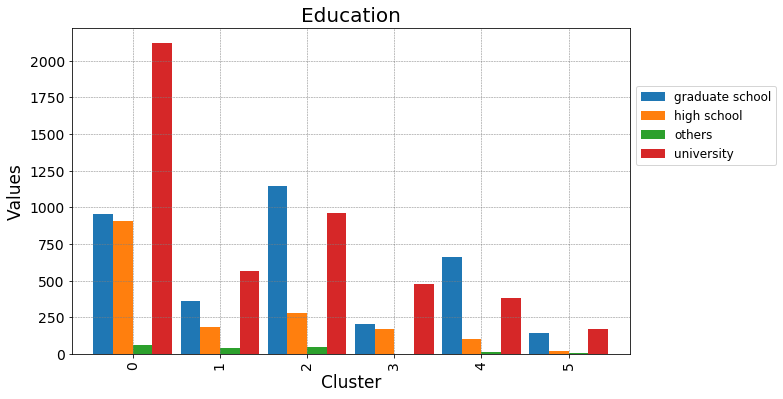

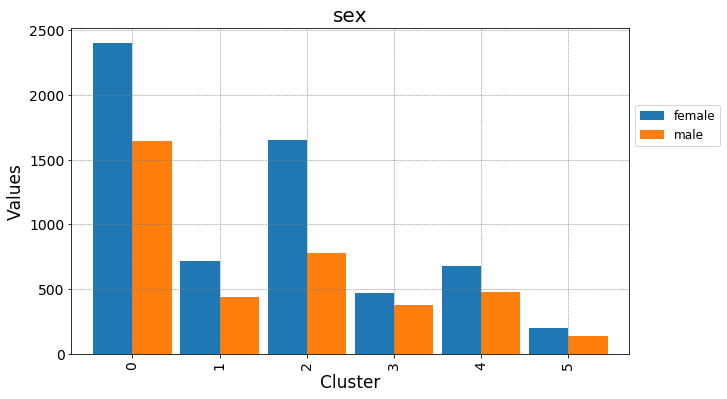

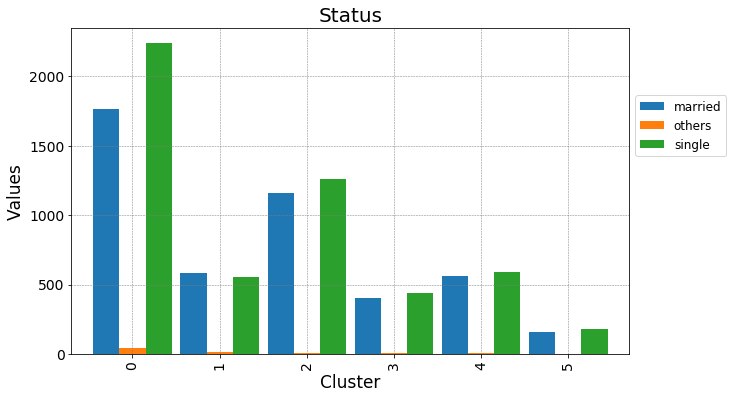

In [120]:
from scipy import stats
k=5

data2['Lab']=lab2[k]

result=pd.DataFrame(data3.groupby(['Lab'], as_index=False).agg({'ps_mode': lambda x:stats.mode(x)[0]}))
result.drop('Lab',axis=1,inplace=True)
barChart(result,"Payment Satuts","Clusters","Values",True,"",result.index,0,90,False)

result=pd.DataFrame(data3.groupby(['Lab'], as_index=False).agg({'limit':np.mean,
                'ba_m':np.mean,
                'pa_m':np.mean}))
result.drop('Lab',axis=1,inplace=True)
barChart(result,"title","Clusters","Values",True,"",result.index,0,90,False)

crosstab = pd.crosstab( data3['Lab'], data3['credit_default'],normalize='index')
crosstab.plot(kind='bar', stacked=True, title='Default by ' + str('credit_default') + ' class')

result=pd.DataFrame(data3.groupby(['Lab'], as_index=False).agg({'age':np.mean}))
result.drop('Lab',axis=1,inplace=True)
barChart(result,"Age","Clusters","Values",True,"",result.index,0,90,False)

cross=pd.crosstab(data3['Lab'],data3['education'])
barChart(cross,'Education','Cluster','Values',True,"",cross.index,0,90,False)

cross=pd.crosstab(data3['Lab'],data3['sex'])
barChart(cross,'sex','Cluster','Values',True,"",cross.index,0,90,False)

cross=pd.crosstab(data3['Lab'],data3['status'])
barChart(cross,'Status','Cluster','Values',True,"",cross.index,0,90,False)

_=data2.drop('Lab',axis=1)